In [16]:
import pandas as pd

df=pd.read_csv("Airbnb_Open_Data.csv", low_memory=False)
print("Shape Of CSV : " ,df.shape)
print("\nHead Few First Row\n : ", df.head(3))


#Data Info
print("\nInfo : \n", df.info())
print("\nDescribe :\n",df.describe())

#check missing values
print("\nCheck Null Values : \n", df.isnull().sum())

#columns
print(df.columns.tolist())


Shape Of CSV :  (102599, 26)

Head Few First Row
 :          id                                 NAME      host id  \
0  1001254   Clean & quiet apt home by the park  80014485718   
1  1002102                Skylit Midtown Castle  52335172823   
2  1002403  THE VILLAGE OF HARLEM....NEW YORK !  78829239556   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021        

In [28]:
# Clean price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Drop columns with 50%+ missing values
df = df.dropna(thresh=len(df)*0.5, axis=1)

# Fill missing reviews with 0
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)


# Remove extreme prices
df = df[df['price'] < 1000]
#check missing values
print("\nCheck Null Values : \n", df.isnull().sum())
df.to_csv("Clean_Airbnb_Data.csv", index=False)




Check Null Values : 
 id                                    0
name                                199
host_id                               0
host_identity_verified              234
host_name                             0
neighbourhood_group                  23
neighbourhood                        13
lat                                   0
long                                  0
country                               0
country_code                        106
instant_bookable                     84
cancellation_policy                  59
room_type                             0
construction_year                   179
price                                 0
service_fee                         186
minimum_nights                      342
number_of_reviews                     0
last_review                       13150
reviews_per_month                 13140
review_rate_number                  271
calculated_host_listings_count      267
availability_365                    373
dtype: int64


Price Distribution


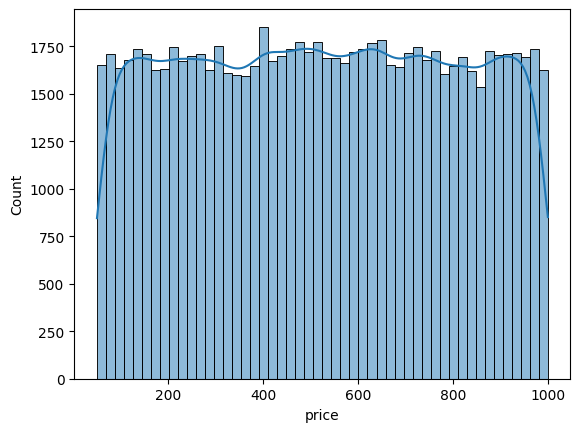

Correlation HeatMap


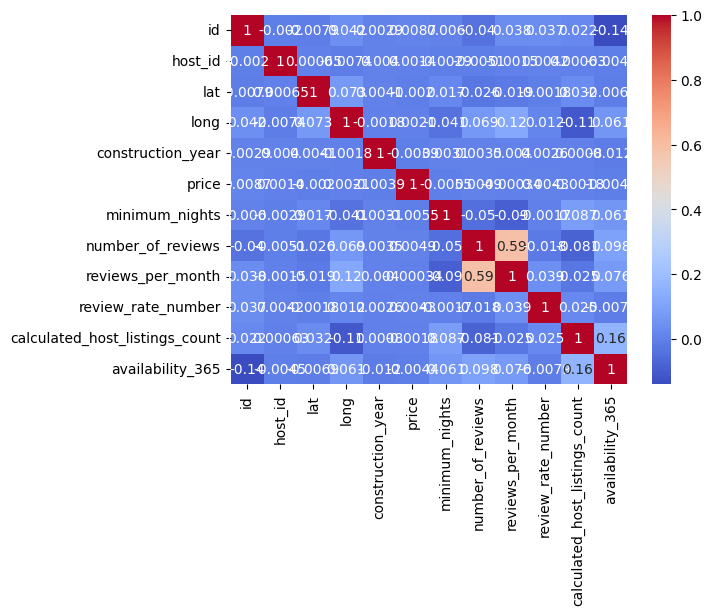

Average price by room type


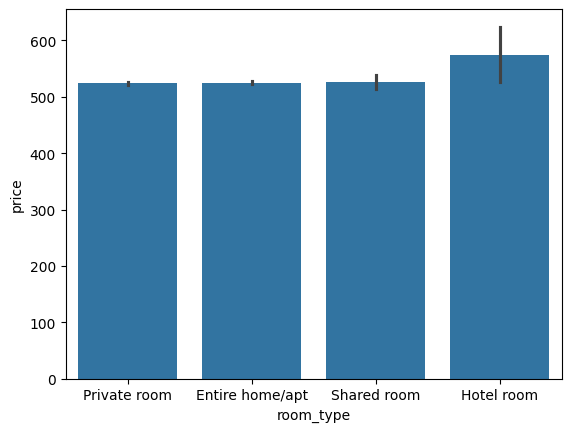

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#import cleaned csv
df=pd.read_csv("Clean_Airbnb_Data.csv", low_memory=False)

# Price Distribution
print("Price Distribution")
sns.histplot(df['price'],bins=50,kde=True)
plt.show()

#correlation heatmap
print("Correlation HeatMap")
no_df=df.select_dtypes(include=['float64','int64'])
sns.heatmap(no_df.corr(),annot=True,cmap='coolwarm')
plt.show()

# 3. Average price by room type
print("Average price by room type")
sns.barplot(x='room_type', y='price', data=df)
plt.show()
